## Nama : Ikhsan Nuh Atthalla
## NIM : 09011281722054
## DETEKSI TUMOR PAYUDARA MENGGUNAKAN ANN DAN EVALUASINYA

<div class = "alert alert-info">
    <b>
        
### IMPORT MODUL YANG DIPERLUKAN </b>
<ul> 
</div>

In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd

Using TensorFlow backend.


<div class = "alert alert-info">
    <b>
        
### Dataset </b>
Dataset yang digunakan adalah Dataset Mammogram dimana Mammogram adalah alat untuk melihat shape, margin, density dari payudara untuk melihat apakah tumor payudara tersebut Benign (Jinak) atau Malignant (Ganas).
<ul> 
    Dataset ini diambil dari link berikut : https://www.mldata.io/dataset-details/mammogram/
</div>

In [2]:
df = pd.read_csv('E:/Kuliah/AI/mammogram_dataset - Copy.csv',sep=',')

In [3]:
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,1,1


<div class = "alert alert-info">
    <b>
        
### Membagi dataset menjadi features dan labels </b>

</div>

In [4]:
dataset = df.values

In [5]:
features = dataset[:,0:5]
labels = dataset [:, 5]

<div class = "alert alert-info">
    <b>
        
### Preprocessing data menggunakan MinMaxScaler </b>
</div>

In [6]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

<div class = "alert alert-info">
    <b>
        
### Melakukan Split data</b>
</div>

In [7]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels,test_size=0.2, shuffle=True, stratify=labels)

<div class = "alert alert-info">
    <b>
        
### Model </b>
<ul>
    - Hidden Layer 1 bernilai 100 dan input layer bernilai 5 menggunakan activation 'relu'
</ul>
<ul>
    - Output layer 1 menggunakan activation 'sigmoid'
</ul>
<ul>
    - loss menggunakan 'binary_crossentropy', optimizer menggunakan 'adam' dan metrics=['accuracy']
</div>

In [8]:
model = Sequential()
model.add(Dense(units= 100, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.save('model.h5')

<div class = "alert alert-info">
    <b>
        
### train data dan test data</b>
<ul> 
    Melakukan Train data dengan epochs 100 dan batch size 8
    
</div>

In [1]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), epochs=100)
acc_testing  = model.evaluate(testing_data, testing_label) 

NameError: name 'model' is not defined

<div class = "alert alert-info">
    <b>
        
### AKURASINYA :</b>
    
</div>

In [10]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.7823834419250488


In [11]:
acc_training.history

{'val_loss': [0.6996543734802483,
  0.6958351221726966,
  0.6924770477522223,
  0.6891737117050843,
  0.6860235997432255,
  0.6830463288979209,
  0.6801944007527643,
  0.6774711340202568,
  0.6747265016476724,
  0.6721171248762101,
  0.6695800488476926,
  0.6672435532579768,
  0.66494753138389,
  0.6626642581094732,
  0.6603954023647802,
  0.6581474159665676,
  0.6558742322452328,
  0.6536096519756811,
  0.6513576322268946,
  0.649030962138596,
  0.6467638031188688,
  0.6444699124968731,
  0.6419124251202598,
  0.6391984885220701,
  0.6366106580576131,
  0.6340212658279301,
  0.6315863015120511,
  0.6291657266221515,
  0.6267959370514272,
  0.6244232043083467,
  0.622032567009407,
  0.619702828671648,
  0.6173002545388869,
  0.614989762942408,
  0.61266601564353,
  0.6103275699319,
  0.6080345225766532,
  0.6057048742635263,
  0.6035197537797721,
  0.6012678371809925,
  0.5990038486342356,
  0.5967240345910423,
  0.5944120247746997,
  0.5922225304526986,
  0.589996029367101,
  0.587869

<div class = "alert alert-info">
    <b>
        
## PLOT </b>
</div>

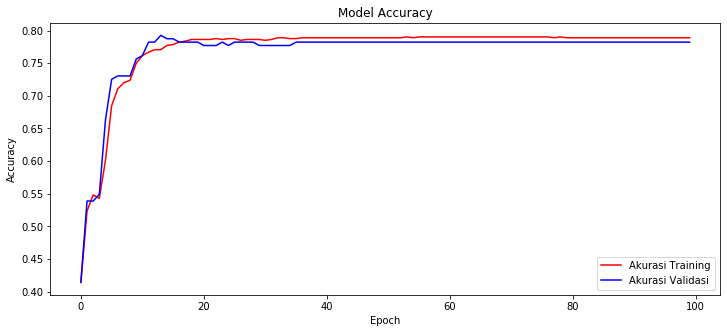

In [12]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

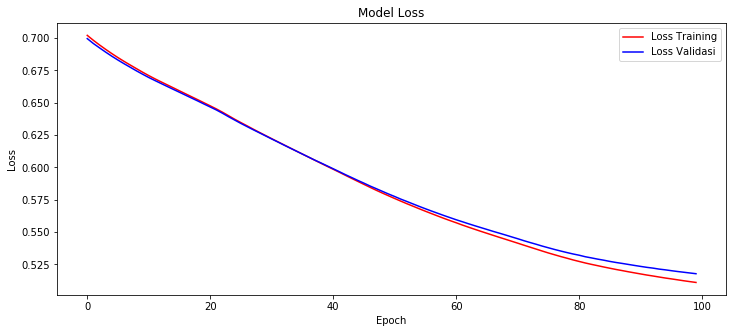

In [13]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

<div class = "alert alert-info">
    <b>
        
### Melakukan Train Prediksi setiap data training dan data testing</b>
    
</div>

In [14]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [15]:
training_predicted

array([[0.73839915],
       [0.18059042],
       [0.5382025 ],
       [0.34854195],
       [0.25762397],
       [0.75801647],
       [0.23135775],
       [0.5382025 ],
       [0.7386843 ],
       [0.23326746],
       [0.6673403 ],
       [0.716684  ],
       [0.17863414],
       [0.32493275],
       [0.18013558],
       [0.5250424 ],
       [0.32766187],
       [0.17891842],
       [0.17850569],
       [0.6756228 ],
       [0.7381229 ],
       [0.42801452],
       [0.4364704 ],
       [0.7385812 ],
       [0.75863963],
       [0.7344183 ],
       [0.23853984],
       [0.32980227],
       [0.41487396],
       [0.71129143],
       [0.64461887],
       [0.7241226 ],
       [0.343458  ],
       [0.5137383 ],
       [0.32256186],
       [0.6340681 ],
       [0.52332383],
       [0.17847154],
       [0.72453046],
       [0.7014414 ],
       [0.179586  ],
       [0.70610946],
       [0.41728514],
       [0.72129226],
       [0.17874089],
       [0.64619046],
       [0.42944425],
       [0.179

<div class = "alert alert-info">
    <b>
        
### EVALUASI Dengan KLASIFIKASI REPORT</b>
    
</div>

In [16]:
y_pred = model.predict_classes(testing_data)
from sklearn.metrics import classification_report
reporty = classification_report(testing_label,y_pred)

In [17]:
x_pred = model.predict_classes(training_data)
from sklearn.metrics import classification_report
reportx = classification_report(training_label,x_pred)

Test

In [18]:
print(reporty)

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       104
           1       0.72      0.87      0.79        89

    accuracy                           0.78       193
   macro avg       0.79      0.79      0.78       193
weighted avg       0.80      0.78      0.78       193



Train

In [19]:
print(reportx)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       412
           1       0.74      0.84      0.79       356

    accuracy                           0.79       768
   macro avg       0.79      0.79      0.79       768
weighted avg       0.80      0.79      0.79       768



<div class = "alert alert-info">
    <b>
        
### CONFUSION MATRIX</b>
    
</div>

Test

In [20]:
from sklearn.metrics import confusion_matrix
testing_cm = confusion_matrix(testing_label, y_pred)
print(testing_cm)

[[74 30]
 [12 77]]


Train

In [21]:
training_cm = confusion_matrix(training_label, x_pred)
print(training_cm)

[[307 105]
 [ 57 299]]


<div class = "alert alert-info">
    <b>
        
### EVALUASI dengan RUMUS (DATA TRAIN)</b>
<ul>
    - Accurary
    </ul>
<ul>
    - Specificity
    </ul>
<ul>
    - Sencitivity
    </ul>
<ul>
    - Precision
    </ul>
<ul>
    - F1_Score
    </ul>
</div>

In [22]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.7890625
Specificity training 0.8398876404494382
Sensitivity training 0.7451456310679612
Precision training 0.8434065934065934
F1 Score training 0.7912371134020619


<div class = "alert alert-info">
    <b>
        
### EVALUASI dengan RUMUS (DATA TEST)</b>
<ul>
    - Accurary
    </ul>
<ul>
    - Specificity
    </ul>
<ul>
    - Sencitivity
    </ul>
<ul>
    - Precision
    </ul>
<ul>
    - F1_Score
    </ul>
</div>

In [23]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.7823834196891192
Specificity testing 0.8651685393258427
Sensitivity testing 0.7115384615384616
Precision testing 0.8604651162790697
F1 Score testing 0.7789473684210527
